In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
from plot_utils import cool_savefig

In [3]:
small_batches_densities = np.zeros((1500*500))
medium_batches_densities = np.zeros((30*500))
large_batches_densities = np.zeros((500))

In [4]:
from glob import glob

filenames = sorted(list(glob('concentration_ML_estimates/*.density.npz')))
len(filenames)

500

In [5]:
for sim_num in range(500):
    npzfile = np.load(filenames[sim_num])
    
    small_batches_densities[sim_num*1500:(sim_num+1)*1500] = npzfile['small_batches']
    medium_batches_densities[sim_num*30:(sim_num+1)*30] = npzfile['medium_batches']
    large_batches_densities[sim_num] = npzfile['whole_sim']

In [6]:
print(np.mean(small_batches_densities < np.inf))
print(np.mean(medium_batches_densities < np.inf))
print(np.mean(large_batches_densities < np.inf))

0.9347546666666666
1.0
1.0


that this is the same percentage as for the plugin a priori isn't surprising (assuming our root finding algorithm is working correctly) because the plugin and MLE are supposed to be finite vs infinite under the same circumstances. so this matching the plugin is not by itself a red flag

a priori we know that estimates less than $0$ (which then were "manually" changed to $0$) are junk caused by `fsolve` being dumb -- so let's try to gauge what percentage of the data is affected by this problem

In [7]:
print(np.mean(small_batches_densities > 0))
print(np.mean(medium_batches_densities > 0))
print(np.mean(large_batches_densities > 0))

1.0
1.0
1.0


In [8]:
def small_part(array, x): return array[array < x]
def finite_part(array): return small_part(array, np.inf)

In [9]:
def x_fmt(x, pos):
    return '$10^{{{}}}$'.format(x).replace('.0','').replace('.5', '')

In [10]:
from statsmodels.distributions.empirical_distribution import ECDF

In [11]:
def crest(index):
    return sns.color_palette("crest")[index]

def magma(index):
    return sns.color_palette("magma")[index]

# Density Heterogeneity

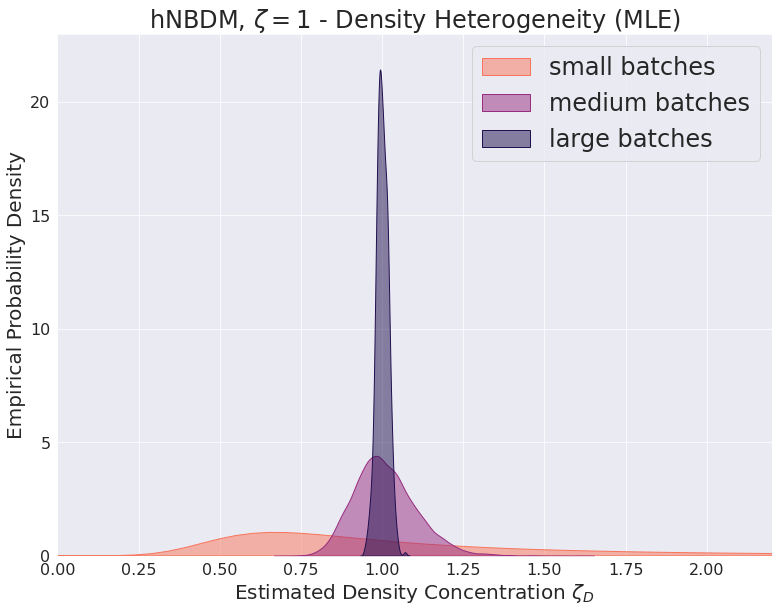

In [12]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12.8, 9.6))
    axis = sns.kdeplot(small_part(small_batches_densities, 10), color=magma(4),fill=True, alpha=0.5)
    sns.kdeplot(finite_part(medium_batches_densities), ax=axis, color=magma(2), fill=True, alpha=0.5)
    sns.kdeplot(finite_part(large_batches_densities), ax=axis, color=magma(0), fill=True, alpha=0.5)
    axis.legend(labels=["small batches", "medium batches", "large batches"], fontsize=24)
    axis.set_ylabel('Empirical Probability Density', fontsize=20)
    axis.set_xlabel('Estimated Density Concentration $\zeta_D$', fontsize=20)
    axis.tick_params(labelsize=16)
    axis.set_xlim((0,2.2))
    axis.set_ylim((0,23))
    title = 'hNBDM, $\zeta=1$ - Density Heterogeneity (MLE)'
    plt.title(title, fontsize=24)
    cool_savefig(title)

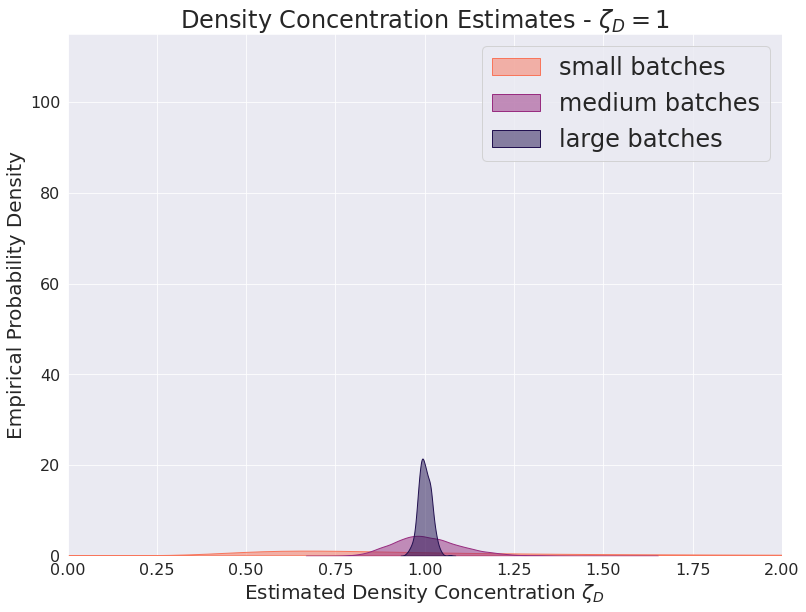

In [13]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12.8, 9.6))
    axis = sns.kdeplot(small_part(small_batches_densities, 10), color=magma(4),fill=True, alpha=0.5)
    sns.kdeplot(finite_part(medium_batches_densities), ax=axis, color=magma(2), fill=True, alpha=0.5)
    sns.kdeplot(finite_part(large_batches_densities), ax=axis, color=magma(0), fill=True, alpha=0.5)
    axis.legend(labels=["small batches", "medium batches", "large batches"], fontsize=24)
    axis.set_ylabel('Empirical Probability Density', fontsize=20)
    axis.set_xlabel('Estimated Density Concentration $\zeta_D$', fontsize=20)
    axis.tick_params(labelsize=16)
    axis.set_xlim((0,2.0))
    axis.set_ylim((0,115))
    title = 'Density Concentration Estimates - $\zeta_D = 1$'
    plt.title(title, fontsize=24)
    cool_savefig(title)

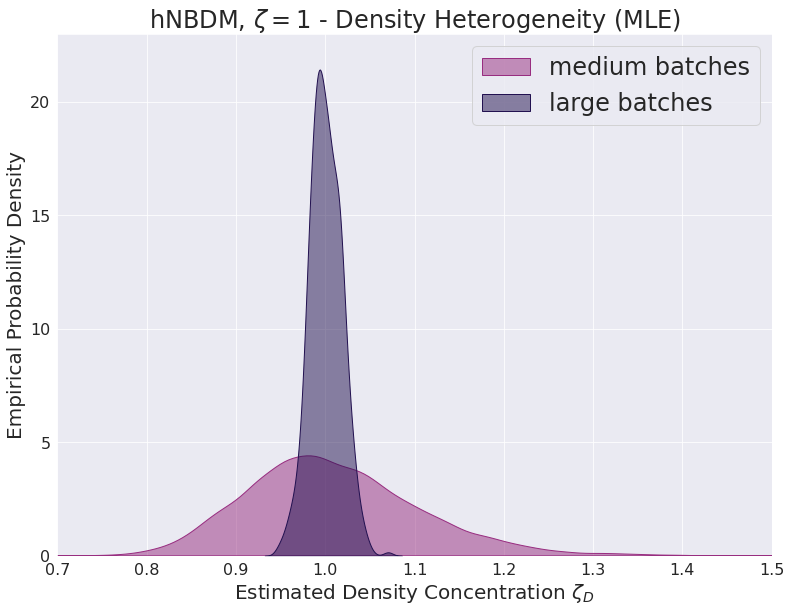

In [14]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12.8, 9.6))
    axis = sns.kdeplot(finite_part(medium_batches_densities), color=magma(2), fill=True, alpha=0.5)
    sns.kdeplot(finite_part(large_batches_densities), ax=axis, color=magma(0), fill=True, alpha=0.5)
    axis.legend(labels=["medium batches", "large batches"], fontsize=24)
    axis.set_ylabel('Empirical Probability Density', fontsize=20)
    axis.set_xlabel('Estimated Density Concentration $\zeta_D$', fontsize=20)
    axis.tick_params(labelsize=16)
    title = 'hNBDM, $\zeta=1$ - Density Heterogeneity (MLE)'
    plt.title(title, fontsize=24)
    axis.set_xlim((0.7,1.5))
    axis.set_ylim((0,23))
    cool_savefig(title + ' zoom')

Why do these look exactly the same as the plugin?

In [15]:
small_batches_alt = np.zeros((1500*500))
medium_batches_alt = np.zeros((30*500))
large_batches_alt = np.zeros((500))

In [16]:
filenames = sorted(list(glob('concentration_estimates/*.npz')))

for sim_num in range(500):
    npzfile = np.load(filenames[sim_num])
    
    small_batches_alt[sim_num*1500:(sim_num+1)*1500] = npzfile['small_batches'][0,:]
    medium_batches_alt[sim_num*30:(sim_num+1)*30] = npzfile['medium_batches'][0,:]
    large_batches_alt[sim_num] = npzfile['whole_sim'][0]

In [17]:
np.mean((large_batches_densities - large_batches_alt)**2)

9.856707711270741e-08

In [18]:
np.median((large_batches_densities - large_batches_alt)**2)

4.0899153616443216e-08

In [19]:
np.mean((medium_batches_densities - medium_batches_alt)**2)

2.7773968627945255e-06

In [20]:
np.median((medium_batches_densities - medium_batches_alt)**2)

1.238185882965929e-06

In [21]:
np.mean((finite_part(small_batches_densities) - finite_part(small_batches_alt))**2)

23356.327249505055

In [22]:
np.median((finite_part(small_batches_densities) - finite_part(small_batches_alt))**2)

5.995088221026812e-05

OK so the values really are actually just that close to each other usually... huh